<a href="https://colab.research.google.com/github/leeju0/DATA_Analytics/blob/main/%ED%94%84%EB%A1%9C%EC%95%BC%EA%B5%AC_%EC%84%A0%EC%88%98_%EB%8B%A4%EC%9D%8C_%ED%95%B4_%EC%97%B0%EB%B4%89_%EC%98%88%EC%B8%A1_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


In [72]:
picher = pd.read_csv("/content/drive/MyDrive/Data_Analytics/picher_stats_2017.csv")
batter = pd.read_csv("/content/drive/MyDrive/Data_Analytics/batter_stats_2017.csv")

picher.head()


,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [21]:
#연봉에 대한 정보
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

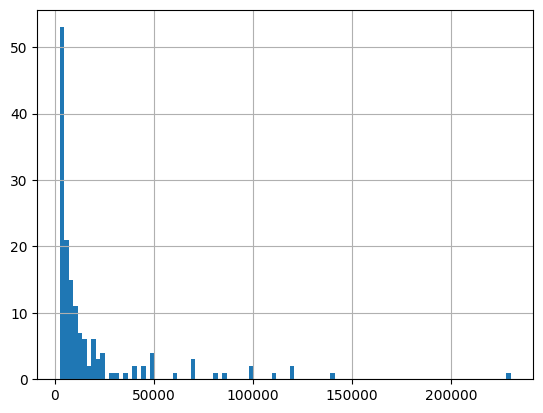

In [22]:
#연봉 분포 출력
picher['연봉(2018)'].hist(bins=100)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48393 (\N{HANGUL SYLLABLE BONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


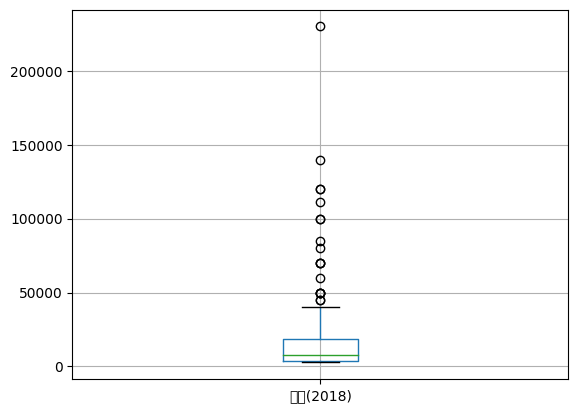

In [23]:
picher.boxplot(column=['연봉(2018)'])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54848 (\N{HANGUL SYLLABLE HOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

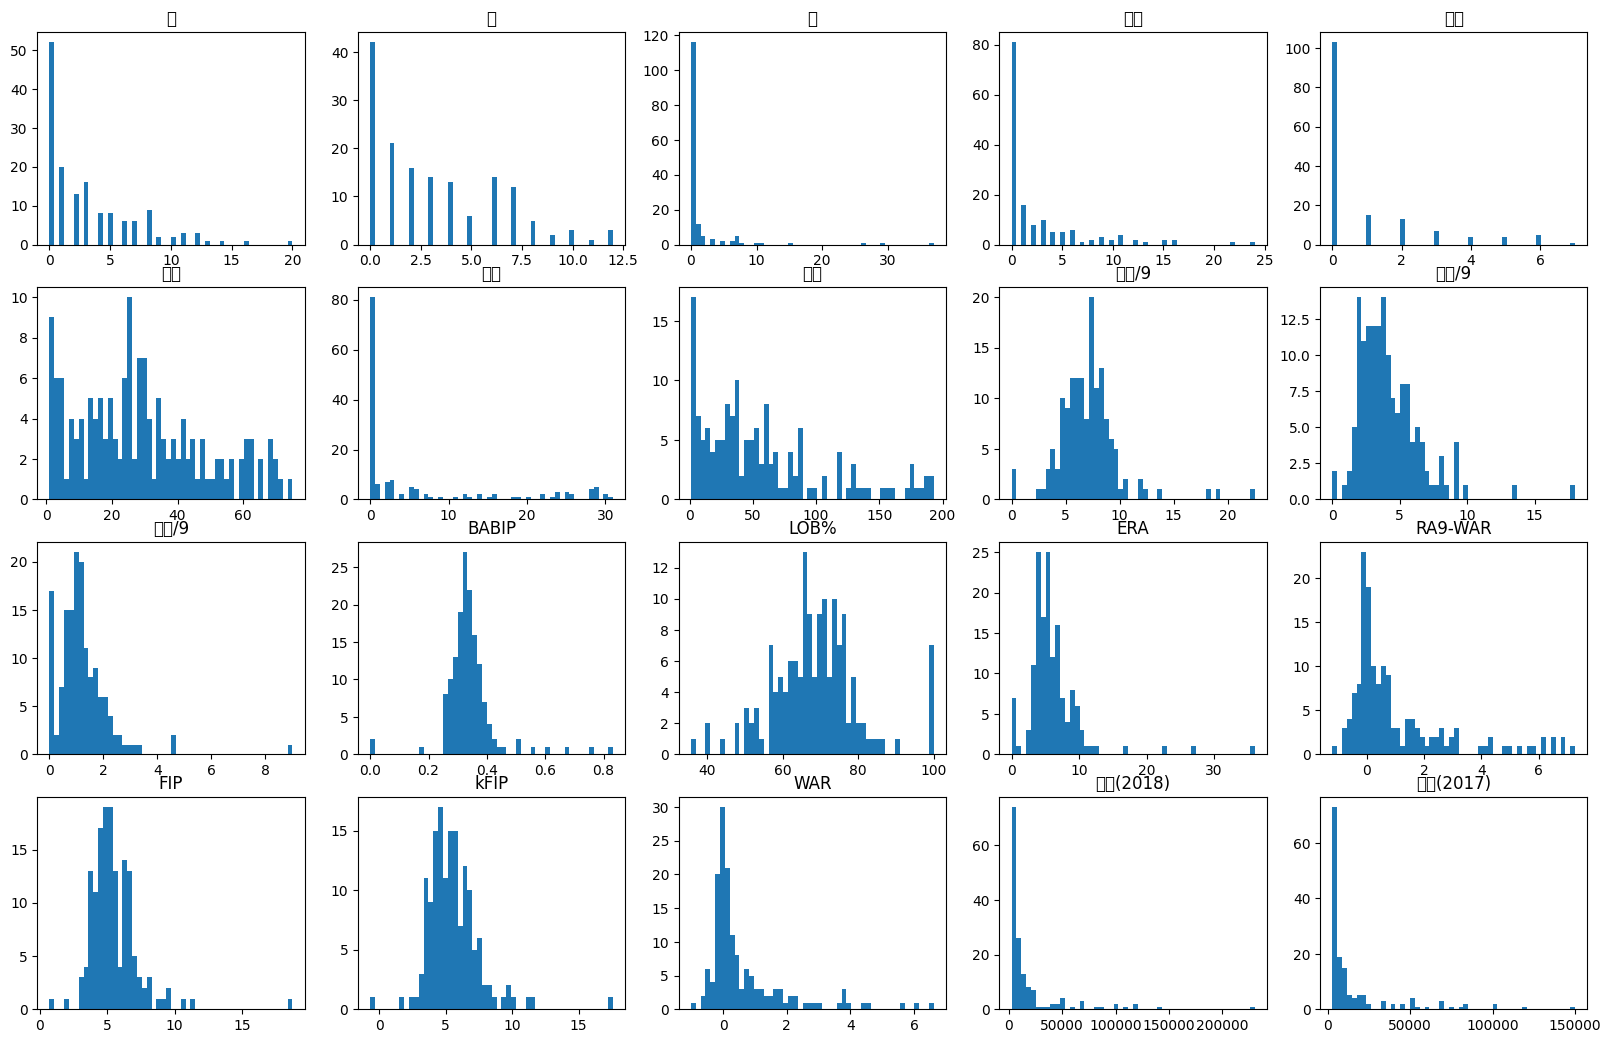

In [31]:
# 회귀 분석에 사용할 피처를 찾기 위해
picher_features_df = picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9','볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2018)','연봉(2017)']]

#각 피처들에 대한 히스토그램 출력
def plot_hist_each_column(df):
  plt.rcParams['figure.figsize'] = [20,16]
  fig = plt.figure(1)

  #df의 열 개수 만큼의 subplot 출력
  for i in range(len(df.columns)):
    ax = fig.add_subplot(5,5,i+1)
    plt.hist(df[df.columns[i]], bins = 50)
    ax.set_title(df.columns[i])
  plt.show()
plot_hist_each_column(picher_features_df)

In [75]:
#피처 스케일링


#판다스 형태로 정의된 데이터를 출력할 때 scientific-notation이 아닌 float 모양으로 출력되게 해준다.
pd.options.mode.chained_assignment = None

#피처 각각에 대한 스케일링을 수행하는 함수 정의
def standard_scaling(df, scale_columns):
  for col in scale_columns:
    series_mean = df[col].mean()
    series_std = df[col].std()
    df[col] = df[col].apply(lambda x : (x-series_mean)/series_std)
  return df


#피처 각각에 대한 스케일링 수행
scale_columns = ['승','패','세','홀드','블론','경기','선발','이닝','삼진/9','볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR','FIP','kFIP','WAR','연봉(2017)']
picher_df = standard_scaling(picher, scale_columns)
picher_df = picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


In [35]:
#'팀명' 피처를 원-핫 인코딩으로 변환한다
team_encoding = pd.get_dummies(picher_df['팀명'])
picher_df = picher_df.drop('팀명',axis=1)
picher_df = picher_df.join(team_encoding)
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


In [68]:
# picher데이터를 학습용 테스트용 데이터셋 분리하기
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리
X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

# 회귀 모델 학습하기
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

#학습된 계수 출력하기
print(lr.coef_)

[-0.04786627 -0.01346728 -3.04246951 -0.05044684  0.05080696 -0.02414453
 -0.0444572  -0.01692096  0.12795775  0.02903539  0.3320053   2.51036516
 -0.07867911 -0.02883312  0.01454106  0.2460238   0.04107999 -0.09083678
  0.17442938 -0.15504813 -0.00810251  0.0076283   0.6182979   0.027602
  0.04206816  0.11679881 -0.03022142  0.58643087]


In [51]:
import statsmodels.api as sm

#statsmodel 라이브러리로 회귀 분석 수행
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           7.70e-42
Time:                        09:34:55   Log-Likelihood:                 3.3433
No. Observations:                 121   AIC:                             49.31
Df Residuals:                      93   BIC:                             127.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0085      0.023     -0.376      0.708      -0.053       0.036
BABIP         -0.0479      0.042     -1.145      0.255      -0.131       0.035
ERA           -0.0135      0.075     -0.179      0.858      -0.163       0.136
FIP           -3.0425      3.048     -0.998      0.321      -9.094       3.009
KIA           -0.0514      0.072     -0.716      0.476      -0.194       0.091
KT             0.0499      0.069      0.723      0.471      -0.087       0.187
LG            -0.0251      0.078     -0.323      0.747      -0.179       0.129
LOB%          -0.0445      0.051     -0.879      0.382      -0.145       0.056
NC            -0.0179      0.086     -0.208      0.836      -0.189       0.153
RA9-WAR        0.1280      0.095      1.351      0.180      -0.060       0.316
SK             0.0281      0.073      0.387      0.699      -0.116       0.172
WAR            0.3320      0.082      4.057      0.000       0.169       0.495
kFIP           2.5104      2.570      0.977      0.331      -2.594       7.615
경기            -0.0787      0.095     -0.824      0.412      -0.268       0.111
두산            -0.0298      0.084     -0.356      0.723      -0.196       0.136
롯데             0.0136      0.083      0.164      0.870      -0.151       0.178
볼넷/9           0.2460      0.203      1.213      0.228      -0.157       0.649
블론             0.0411      0.040      1.023      0.309      -0.039       0.121
삼성            -0.0918      0.080     -1.144      0.256      -0.251       0.068
삼진/9           0.1744      0.235      0.741      0.461      -0.293       0.642
선발            -0.1550      0.177     -0.874      0.384      -0.507       0.197
세             -0.0081      0.042     -0.194      0.847      -0.091       0.075
승              0.0076      0.072      0.107      0.915      -0.135       0.150
연봉(2017)       0.6183      0.041     15.055      0.000       0.537       0.700
이닝             0.0276      0.214      0.129      0.898      -0.398       0.453
패              0.0421      0.063      0.672      0.503      -0.082       0.166
한화             0.1159      0.071      1.641      0.104      -0.024       0.256
홀드            -0.0302      0.053     -0.571      0.569      -0.135       0.075
홈런/9           0.5864      0.542      1.082      0.282      -0.490       1.663
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.61e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

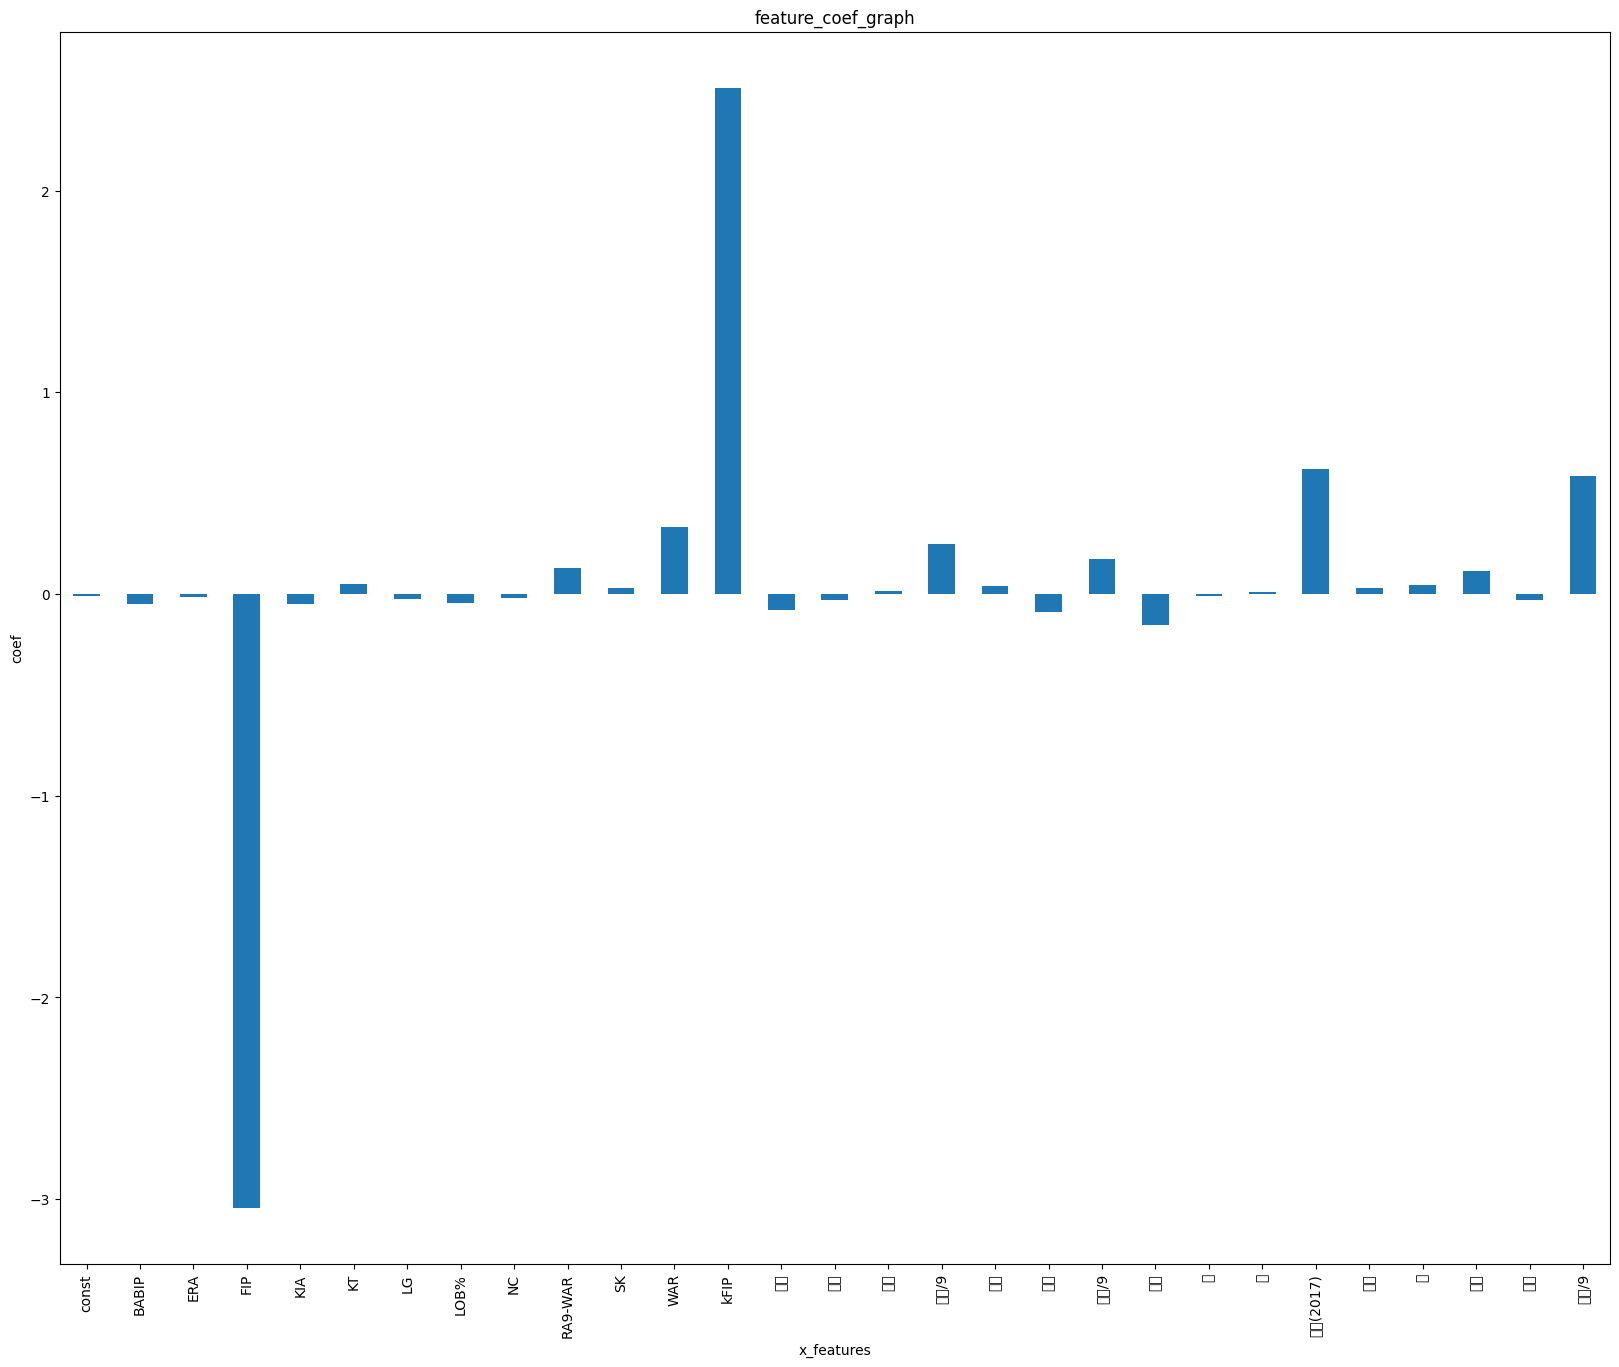

In [59]:
#가장 영향력이 강한 피처 시각화

# 한글 출력을 위한 사전 설정 단계
plt.rc('font',family='NanumGothic')
plt.rcParams['figure.figsize'] = [20,16]

#회귀 계수를 리스트로 반환
coefs = model.params.tolist()
coefs_series = pd.Series(coefs)

#변수명을 리스트로 반환
x_labels = model.params.index.tolist()

#회귀 계수 출력
ax = coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

plt.show()

In [60]:
#R2 socre로 예측 모델 평가하기

# 학습 데이터와 테스트 데이터로 분리
X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 19)

## 회귀 모델 학습하기
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# 회귀 분석 모델 평가
print(model.score(X_train, y_train)) #train R2 score 출력
print(model.score(X_test, y_test)) #test R2 score 출력

0.9276949405576704
0.8860171644977816


In [61]:
# RMSE score로 휘귀분석 모델 평가
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

0.23537641149363744
0.4625196329970635


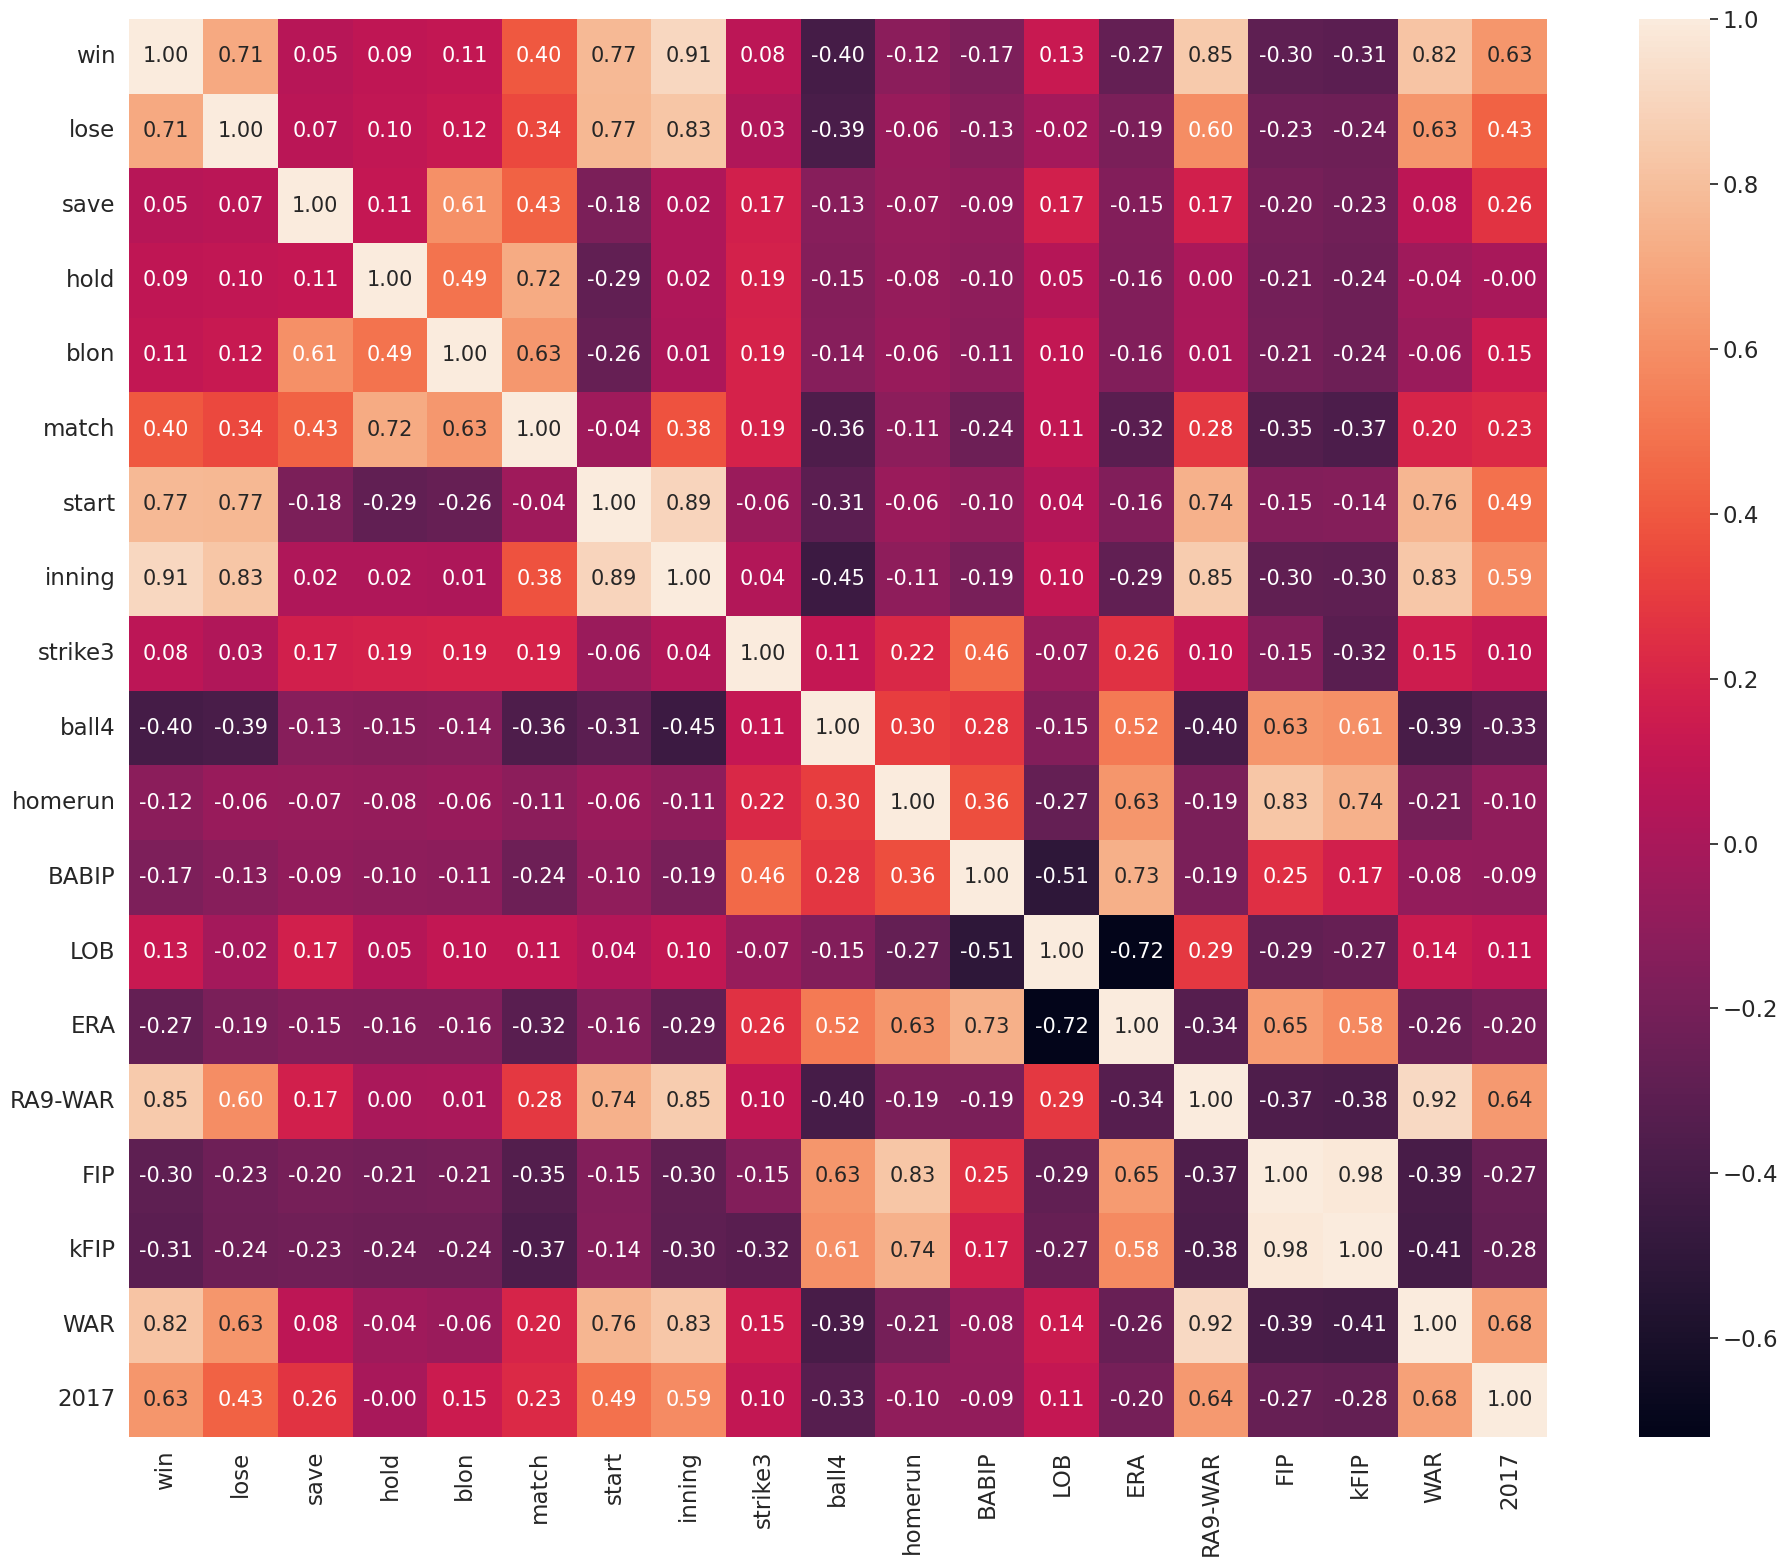

In [79]:
#피처들의 상관관계 분석하기
import seaborn as sns

#피처 간 상관계수 행렬 계산
corr = picher_df[scale_columns].corr(method='pearson')
show_cols = ['win','lose','save','hold','blon','match','start','inning','strike3','ball4','homerun','BABIP','LOB','ERA','RA9-WAR','FIP','kFIP','WAR','2017']

#corr 행렬 히트맵 시각화
plt.rc('font', family='NanumGothicOTF')
sns.set(font_scale=1.5)

hm = sns.heatmap(corr.values,
                 cbar = True,
                 annot =True,
                 square = True,
                 fmt='.2f',
                 annot_kws={'size':15},
                 yticklabels=show_cols,
                 xticklabels=show_cols)
plt.tight_layout()
plt.show()

In [80]:
#회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

#피처마다 VIF 계수를 출력한다
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK
